In [1]:
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

import os
import matplotlib.pyplot as plt
if not os.environ.get('PYSHS_COLOR', False):
    plt.style.use('./grayscale.mplstyle')



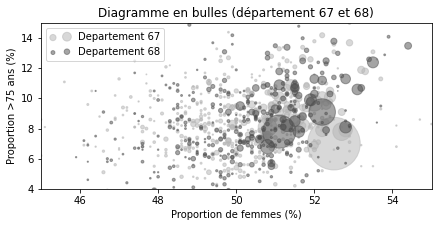

In [2]:
import pandas as pd
tableau = pd.read_csv("./data/data-chap6.csv")
donnees = tableau[["CODGEO", "REG","DEP", "LIBGEO",
              "P15_POP","P15_POPF","P15_POP90P", "C15_POP15P_CS6",
              "P15_POP7589","prop_f","prop_sup75"]]

import matplotlib.pyplot as plt
# Paramètres et données
colors = {"67":"C0","68":"C1"}
donnees_filtrees = donnees[donnees["DEP"].isin(["67","68"])]

# Création de la figure
fig,ax = plt.subplots()
for dep_number,j in donnees_filtrees.groupby("DEP"):
    j.plot(kind="scatter",x="prop_f",
           y="prop_sup75",ax=ax,
           c=colors[dep_number],
           alpha=0.5,
           s=j["P15_POP"]/100, label=f"Departement {dep_number}")

# Options et visualisation
ax.set_xlim(45,55)
ax.set_ylim(4,15)
ax.set_xlabel("Proportion de femmes (%)")
ax.set_ylabel("Proportion >75 ans (%)")
ax.set_title("Diagramme en bulles (département 67 et 68)")
ax.legend(loc=2, markerscale=1/6, scatterpoints=2  )
fig.savefig("basrhin-bubblechart.png")
plt.show()

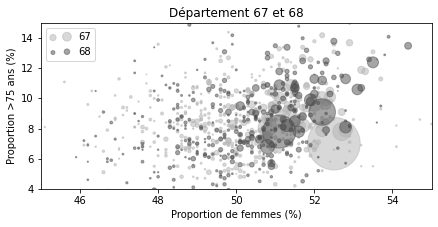

In [3]:
# générique
import pandas as pd
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

# spécifique car le format peut changer
tableau = pd.read_csv("./data/data-chap6.csv")

# spécifique pour le département mais pas pour les couleurs
colors = {"67":"C0","68":"C1"}

# générique (toujours les mêmes colonnes)
donnees = tableau[["CODGEO", "REG","DEP", "LIBGEO",
          "P15_POP","P15_POPF","P15_POP90P", "C15_POP15P_CS6",
          "P15_POP7589","prop_f","prop_sup75"]]
donnees_filtrees = donnees[donnees["DEP"].isin(["67","68"])]

# générique, c'est l'opération de traitement des données
for dep_number,j in donnees_filtrees.groupby("DEP"):
    j.plot(kind="scatter", x="prop_f", y="prop_sup75",
           ax=ax, c=colors[dep_number],
           alpha=0.5,s=j["P15_POP"]/100,
           label=dep_number)

# spécifique, car cela pourrait éventuellement varier
ax.set_xlim(45,55)
ax.set_ylim(4,15)

# générique
ax.set_xlabel("Proportion de femmes (%)")
ax.set_ylabel("Proportion >75 ans (%)")

# générique dans la formulation mais spécifique pour les numéros
ax.set_title("Département 67 et 68")

# générique
ax.legend(loc=2, markerscale=1/6, scatterpoints=2  )

# spécifique, le nom peut changer
fig.savefig("basrhin-bubblechart.png")
plt.show()

In [4]:
#...

dep1 = "67"
dep2 = "68"
colors = {dep1:"C0",dep2:"C1"}

#...

minx, maxx = 45, 55
miny, maxy = 4, 15

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

#...

(4.0, 15.0)

In [5]:
# générique pour l'ensemble du script
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# générique, définition d'une fonction
def draw_bubble_chart(tab, dep1, dep2, minx, maxx, miny, maxy ):
    """
    Cette fonction trace un diagramme en bulle.
    """
    colors = {dep1:"C0",dep2:"C1"}
    donnees = tab[["CODGEO", "REG","DEP", "LIBGEO",
              "P15_POP","P15_POPF","P15_POP90P", "C15_POP15P_CS6",
              "P15_POP7589","prop_f","prop_sup75"]]
    donnees_filtrees = donnees[donnees["DEP"].isin([dep1,dep2])]

    fig,ax = plt.subplots()
    el = []
    for dep_number,j in donnees_filtrees.groupby("DEP"):
        j.plot(kind="scatter", x="prop_f", y="prop_sup75",
                ax=ax, c=colors[dep_number], alpha=0.5,
                s=j["P15_POP"]/100,label=dep_number)

    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.legend(loc=2, markerscale=1/6, scatterpoints=2)
    ax.set_xlabel("Proportion de femmes (%)")
    ax.set_ylabel("Proportion >75 ans (%)")
    ax.set_title("Département {} et {}".format(dep1,dep2))
    return fig, ax

(<Figure size 504x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Département 22 et 35'}, xlabel='Proportion de femmes (%)', ylabel='Proportion >75 ans (%)'>)

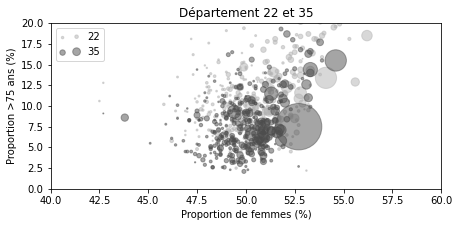

In [6]:
tableau_ = pd.read_csv("./data/data-chap6.csv")

draw_bubble_chart(tableau_, '22', '35',
      minx=40, maxx=60, miny=0, maxy=20 )

In [7]:
"""
Ce fichier contient ma boîte à outils de fonctions utiles
Fonctions disponibles :
- bubble chart
"""

__version__ = '0.0.1'

import matplotlib.pyplot as plt

def draw_bubble_chart(tableau,dep1,dep2,minx,maxx,miny,maxy ):
    """
    Cette fonction trace un diagramme en bulle
    """
    colors = {dep1:"gray",dep2:"lightgray"}

    donnees = tableau[["CODGEO", "REG","DEP", "LIBGEO",
              "P15_POP","P15_POPF","P15_POP90P", "C15_POP15P_CS6",
              "P15_POP7589","prop_f","prop_sup75"]]

    donnees_filtrees = donnees[donnees["DEP"].isin([dep1,dep2])]

    fig,ax = plt.subplots()
    el = []
    for dep_number,j in donnees_filtrees.groupby("DEP"):
        j.plot(kind="scatter", x="prop_f", y="prop_sup75",
                ax=ax, c=colors[dep_number], alpha=0.5,
                s=j["P15_POP"]/100, label=dep_number)

    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    ax.legend(loc=2, markerscale=1/6, scatterpoints=2)
    ax.set_xlabel("Proportion de femmes (%)")
    ax.set_ylabel("Proportion >75 ans (%)")
    ax.set_title(f"Diagramme en bulle (dep. {dep1} et {dep2})")
    return fig, ax